In [6]:
!pip install -q scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 15.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [7]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [8]:
Temperature = ctrl.Antecedent(np.arange(10, 40, 0.1), "Temperature")
Temperature["Cold"] = fuzz.trimf(Temperature.universe, [10,10,25])
Temperature["Medium"] = fuzz.trimf(Temperature.universe, [15,25,35])
Temperature["Hot"] = fuzz.trimf(Temperature.universe, [25, 40, 40])
Humidity = ctrl.Antecedent(np.arange(20, 100, 0.1), "Humidity")
Humidity["Dry"] = fuzz.trimf(Humidity.universe, [20,20,60])
Humidity["normal"] = fuzz.trapmf(Humidity.universe, [30,45,75,90])
Humidity["Wet"] = fuzz.trimf(Humidity.universe, [60, 100, 100])
Speed = ctrl.Consequent(np.arange(0, 100, 0.1), "Speed" , defuzzify_method='centroid')
Speed["Slow"] = fuzz.trimf(Speed.universe, [0,0, 50])
Speed["Moderate"] = fuzz.trimf(Speed.universe, [10, 50, 90])
Speed["Fast"] = fuzz.trimf(Speed.universe, [50, 100, 100])

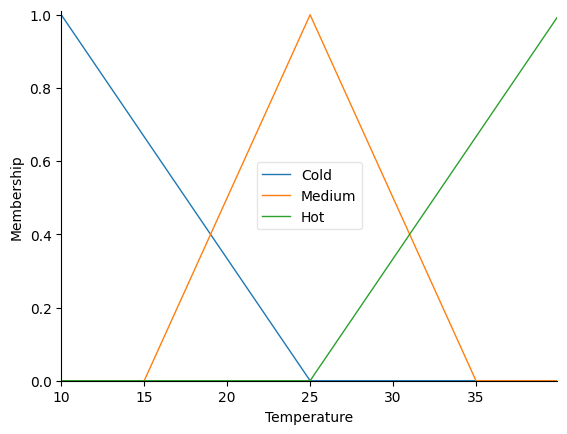

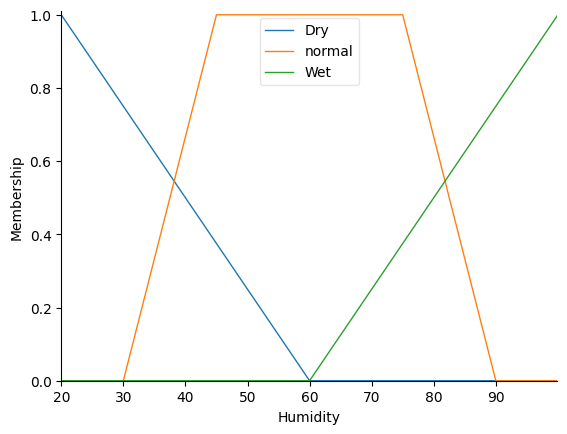

In [9]:
Temperature.view()
Humidity.view()
# Speed.view()

In [10]:
rule1 = ctrl.Rule(Temperature["Cold"] & Humidity["Wet"] , Speed["Slow"])
rule2 = ctrl.Rule(Temperature["Cold"] & Humidity["normal"] , Speed["Slow"])
rule3 = ctrl.Rule(Temperature["Medium"] & Humidity["Wet"] , Speed["Slow"])

rule4 = ctrl.Rule(Temperature["Cold"] & Humidity["Dry"] , Speed["Moderate"])
rule5 = ctrl.Rule(Temperature["Medium"] & Humidity["normal"] , Speed["Moderate"])
rule6 = ctrl.Rule(Temperature["Hot"] & Humidity["Wet"] , Speed["Moderate"])

rule7 = ctrl.Rule(Temperature["Medium"] & Humidity["Dry"] , Speed["Fast"])
rule8 = ctrl.Rule(Temperature["Hot"] & Humidity["normal"] , Speed["Fast"])
rule9 = ctrl.Rule(Temperature["Hot"] & Humidity["Dry"] , Speed["Fast"])

37.572463325805984


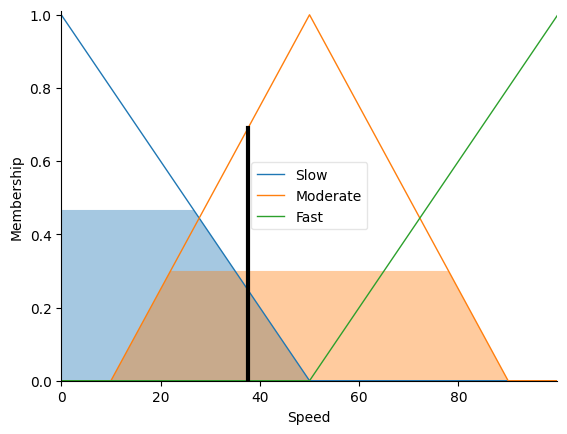

In [11]:
AirCondition_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])

AirCondition = ctrl.ControlSystemSimulation(AirCondition_ctrl)

AirCondition.input['Temperature'] = 18
AirCondition.input['Humidity'] = 60
AirCondition.compute()
print(AirCondition.output['Speed'])
Speed.view(sim=AirCondition)